In [1]:
# scvelo virtual environment

import scvelo as scv
import numpy as np
import scanpy as sc
import math

In [2]:
n_obs = 500
n_vars = 10
t_max = 25
alpha = 5
beta = .3
gamma = .5
noise_level = 1
seed = 520
max_thre = 10

# generate S with Gaussian noise
data = scv.datasets.simulation(n_obs=n_obs,
                               n_vars=n_vars,
                               t_max=t_max,
                               alpha=alpha,
                               beta=beta,
                               gamma=gamma,
                               noise_level=noise_level,
                               random_seed=seed)
S = data.layers['spliced']
U = data.layers['unspliced']
S_lam = math.e**(math.log(1000)*S/np.max(S)) - 1
U_lam = math.e**(math.log(1000)*S/np.max(S)) - 1

np.random.seed(929)
S_poi = np.round(S_lam)
U_poi = np.round(U_lam)
data.layers['spliced_gaussian'] = S.copy()
data.layers['unspliced_gaussian'] = U.copy()
data.layers['spliced'] = S_poi.copy()
data.layers['unspliced'] = U_poi.copy()
data.X = S_poi.copy() # need to make sure X is the same as spliced matrix
data.layers['true_velocity'] = beta*U_poi-gamma*S_poi

In [3]:
# https://github.com/theislab/scvelo/issues/1212

scv.pp.log1p(data)
sc.pp.pca(data)
sc.pp.neighbors(data, n_pcs=30, n_neighbors=30)
scv.pp.moments(data, n_pcs=None, n_neighbors=None)
sc.tl.umap(data,alpha=alpha,gamma=gamma)
scv.tl.recover_dynamics(data,t_max=25)
scv.tl.velocity_graph(data,vkey="true_velocity")

Normalized count data: spliced, unspliced.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/12 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:00) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocity graph (using 1/12 cores)
    finished (0:00:00) --> added 
    'true_velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'true_velocity_pca', embedded velocity vectors (adata.obsm)


/opt/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


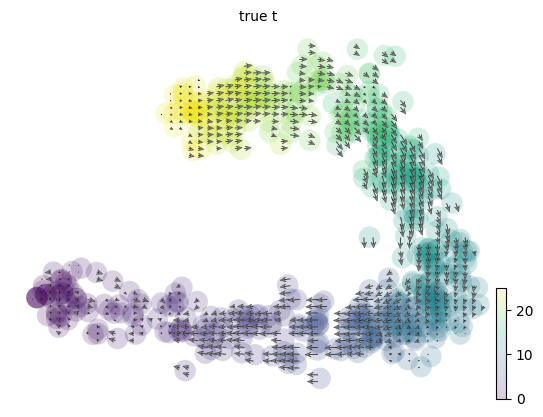

In [4]:
scv.pl.velocity_embedding_grid(data,
                               basis='pca',
                               color="true_t",
                               vkey="true_velocity",
                               arrow_length=2,
                               arrow_size=2,
                               min_mass=10)

/opt/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


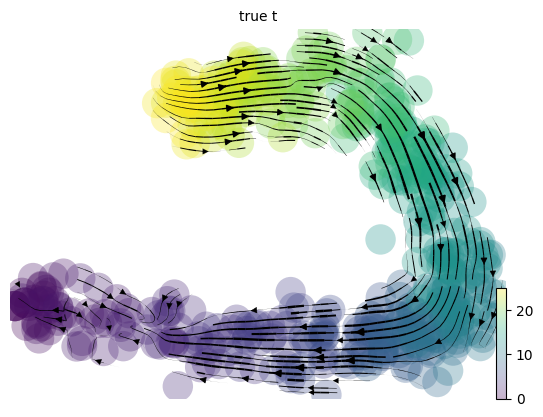

In [14]:
scv.pl.velocity_embedding_stream(data,
                               basis='pca',
                               color="true_t",
                               vkey="true_velocity")

Now for scVelo

In [5]:
data2 = scv.datasets.simulation(n_obs=n_obs,
                               n_vars=n_vars,
                               t_max=t_max,
                               alpha=alpha,
                               beta=beta,
                               gamma=gamma,
                               noise_level=noise_level,
                               random_seed=seed)
S = data2.layers['spliced']
U = data2.layers['unspliced']
S_lam = math.e**(math.log(1000)*S/np.max(S)) - 1
U_lam = math.e**(math.log(1000)*S/np.max(S)) - 1

np.random.seed(929)
S_poi = np.round(S_lam)
U_poi = np.round(U_lam)
data2.layers['spliced'] = S_poi.copy()
data2.layers['unspliced'] = U_poi.copy()
data2.X = S_poi.copy() # need to make sure X is the same as spliced matrix

In [6]:
# https://github.com/theislab/scvelo/issues/1212

scv.pp.log1p(data2)
sc.pp.pca(data2)
sc.pp.neighbors(data2, n_pcs=30, n_neighbors=30)
scv.pp.moments(data2, n_pcs=None, n_neighbors=None)

Normalized count data: spliced, unspliced.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


/var/folders/hs/22vv3mms6xbbkl2xk5frsnhc0000gp/T/ipykernel_51630/2987817171.py:1: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(data2)


In [7]:
data2

AnnData object with n_obs × n_vars = 500 × 10
    obs: 'true_t', 'n_counts'
    var: 'true_t_', 'true_alpha', 'true_beta', 'true_gamma', 'true_scaling'
    uns: 'log1p', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'unspliced', 'spliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [8]:
scv.tl.recover_dynamics(data2)

recovering dynamics (using 1/12 cores)
    finished (0:00:00) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [10]:
scv.tl.velocity(data2, mode='dynamical')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [11]:
scv.tl.velocity_graph(data2)

computing velocity graph (using 1/12 cores)
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


/opt/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


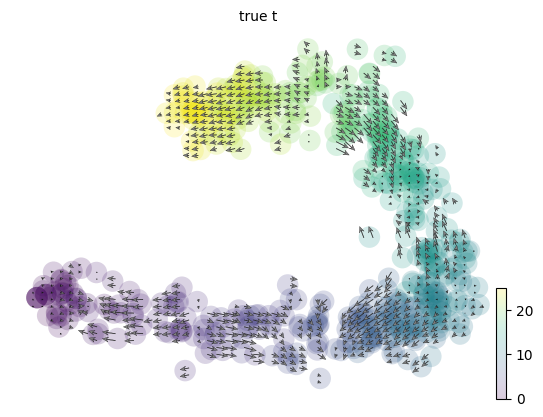

In [12]:
scv.pl.velocity_embedding_grid(data2,
                               basis='pca',
                               color="true_t",
                               arrow_length=2,
                               arrow_size=2,
                               min_mass=10)

/opt/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


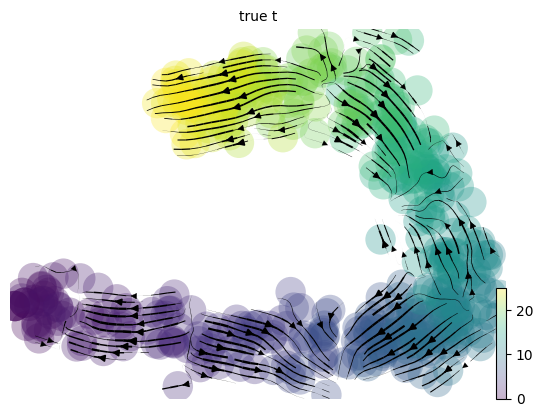

In [15]:
scv.pl.velocity_embedding_stream(data2,
                               basis='pca',
                               color="true_t")